# HistStack

[[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x17edca400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x17ee10160>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x17ee24e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]]

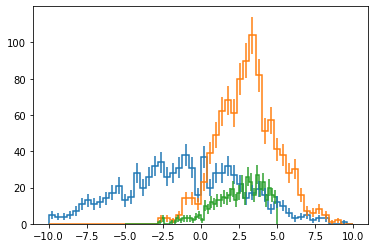

In [1]:
from hist import Hist, Stack, axis
import numpy as np

h1 = Hist(
    axis.Regular(
        50, -5, 5, name="A", label="a [units]", underflow=False, overflow=False
    )
).fill(2 * np.random.normal(size=500) + 3 * np.ones((500,)))

h2 = Hist(
    axis.Regular(
        50, -10, 10, name="B", label="b [units]", underflow=False, overflow=False
    )
).fill(2 * np.random.normal(size=1000) + 3 * np.ones((1000,)))

h3 = Hist(
    axis.Regular(
        50, -10, 10, name="C", label="c [units]", underflow=False, overflow=False
    )
).fill(4 * np.random.normal(size=800) - np.ones((800,)))

Stack(h1, h2, h3).plot()

In [2]:
h4 = Hist(
    axis.Integer(-10, 10, name="D", label="d [units]", underflow=False, overflow=False)
).fill(2 * np.random.normal(size=1000) + 3 * np.ones((1000,)))

Stack(h1, h2, h4).plot()

ValueError: Histograms' axes types don't match